**Dwi Retno Fibriyanti (DA RHEA DAY ONLINE)**

# Capstone Webscrapping using BeautifulSoup
Notebook ini terdapat panduan dan tugas untuk melakukan data processing pada website.

## Background

Pada project ini saya mencoba untuk melakukan scrap data pada website  [CoinGecko](https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel) ,data yang akan di scrap berupa data historis dari `Ethereum` yang terletak pada range tanggal `01-01-2020` sampai `30-06-2021`.Ditabel data historis terdapat kolom `Date`,`Market Cap`,`Volume`,`Open`,`Close`.Tetapi nanti yang akan saya scrap datanya hanya `Date` dan `Volume` saja untuk memvisualisasikan/ membuat plot dari `Ethereum`.

## Requesting the Data and Creating a BeautifulSoup

Melakukan request dengan method `get` untuk mendapatkan halaman website.

In [1]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

Untuk memvisualisasikan apa yang sebenarnya di dapatkan dari `request.get`, kita dapat menggunakan `.content` sehingga apa yang sebenarnya kita dapatkan, di sini akan di *slice* sehingga tidak membuat layar kita penuh dengan html yang kita dapatkan dari halaman. Anda dapat menghapus irisan jika Anda ingin melihat apa yang kami dapatkan sepenuhnya.


In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="de'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Mencari data yang tepat dan meletakan di  `.find()` dan taruh data /kunci yang kita eksplor tadi kesana.Pada website [CoinGecko](https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel) kita dapat menemukan data yang akan kita scrapping dengan cara Inspect Elemen di website tersebut.Pada kasus ini yang akan kita scrap datanya hanya data tanggal `Date` dan data volume `Volume`.Data `Date`dan `Volume` terbungkus dalam table dengan nama class `table table-striped text-sm text-lg-normal` seperti pada gambar dibawah ini.

![image-2.png](assets/gambar1.png)

Untuk mengetahui seperti apa struktur HTML dari `coinGecko` kita dapat mengambil data `Date` dan `Volume` saja maka kita harus mengenali detail tree HTML nya seperti apa.Kalau menggunakan `.content` bisa saja,tetapi pasti membingungkan dan struktur HTML nya masih berantakan.Makanya disini akan menggunakan fungsi yang namanya `prettify` dari `beutifulsoup` agar struktur HTML nya jelas dan agar mudah bagi kita untuk mengerti dan menggambil data yang diinginkan contohnya seperti dibawah ini.

In [4]:
table = soup.find('table',attrs={'class':"table table-striped text-sm text-lg-normal"})
print(table.prettify()[1:1000])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="text-center">
    $27,149,143,847
   </td>
   <td class="text-center">
    $2,169.40
   </td>
   <td class="text-center">
    N/A
   </td>
  </tr>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-29
   </th>
   <td class="text-center">
    $243,040,539,437
   </td>
   <td class="text-center">
    $30,629,329,806
   </td>
   <td class="text-center">
    $2,087.52
   </td>
   <td class="text-center">
    $2,169.40
   </td>
  </tr>
  <tr>
   <th class="font-semibold text-cente


Disini saya ingin mengetahui berapa baris yang ada pada data yang akan kita ambil menggunakan `len()`.Untuk men-scan data /right key yang diperlukan dapat menggunakan `find_all()` dan `select()`.Saya menggunakan CSS Selector `select` pada tag `table` dan class name nya `table-striped` lalu dilanjut dengan table child yaitu `tbody` dan `tr`.Dan ternyata jumlah row data yg akan diambil sebanyak 547 baris data.

In [5]:
scrap=soup.select('table.table-striped tbody tr')
len(scrap)

547

Langkah proses scrapping :

- Jika kita lihat kembali di Inpect Element kita ingin mengambil nilai Tanggal yang terletak di tag `th` dan `scope=row` dan nilai Volume di tag td dan class name `text-center`.Tetapi disini ada 4 class-name yang terkandung class name yang sama yaitu `text-center` yaitu nilai `MarkerCap`, `Volume`, `Open`, `Close`.

- Nilai `Volume` dapat discrap dengan menggunakan CSS Selection `nth-child(n)` nilai 3 pada loop dibawah ini didapatkan dari urutan ke 3 data `Volume` setelah `Date` dan `MarketCap`.Proses loop dimulai dari menginisiasi data temporer yangd dimasukan dalam variabel `temp` dan proses loop akan terus terjadi sebanyak len(scrap) yang artinya sampai 547.

- Data `Date` akan diassign dalam variabel `pick_date` dan data `Volume` akan di assign dalam variabel `pick_volume`.

- Method `get_text(strip=True` berfungsi untuk mengembalikan text yang terdapat pada tag th.



![image.png](assets/Gambar.png) 


![image-2.png](assets/gambar2.png)


In [6]:
temp = [] #initiating a tuple

for i in scrap:

    #scrapping process
    #ambil tanggal
    pick_date=i.select_one('th[scope="row"]').get_text(strip=True)
    
    #ambil volume
    pick_volume=i.select_one('td.text-center:nth-child(3)').get_text(strip=True)   
    
    temp.append((pick_date,pick_volume))
temp 

[('2021-06-30', '$27,149,143,847'),
 ('2021-06-29', '$30,629,329,806'),
 ('2021-06-28', '$24,316,408,028'),
 ('2021-06-27', '$24,249,510,321'),
 ('2021-06-26', '$25,981,381,067'),
 ('2021-06-25', '$22,447,489,242'),
 ('2021-06-24', '$28,098,744,045'),
 ('2021-06-23', '$38,755,019,937'),
 ('2021-06-22', '$39,499,960,408'),
 ('2021-06-21', '$26,235,850,447'),
 ('2021-06-20', '$20,456,963,375'),
 ('2021-06-19', '$26,204,484,921'),
 ('2021-06-18', '$25,708,624,827'),
 ('2021-06-17', '$26,150,320,395'),
 ('2021-06-16', '$26,803,957,680'),
 ('2021-06-15', '$28,128,172,338'),
 ('2021-06-14', '$29,382,118,964'),
 ('2021-06-13', '$28,235,882,062'),
 ('2021-06-12', '$26,751,786,966'),
 ('2021-06-11', '$33,075,957,437'),
 ('2021-06-10', '$43,973,432,438'),
 ('2021-06-09', '$48,344,195,674'),
 ('2021-06-08', '$37,385,872,210'),
 ('2021-06-07', '$29,050,162,249'),
 ('2021-06-06', '$34,731,979,705'),
 ('2021-06-05', '$39,996,583,175'),
 ('2021-06-04', '$38,104,663,185'),
 ('2021-06-03', '$39,148,856

Dikarenakan data diatas masih terbalik yang kita inginkan adalah data tahun 2020 dahulu baru setelah itu tahun 2021.Untuk mereverse nilai nya dapat menggunakan *list slice* pada bagian nilai -1 untuk membalik data atas menjadi urutan bawah dan sebaliknya.Contohnya ada pada code di bawah ini

In [7]:
temp=temp[::-1]
temp

[('2020-01-01', '$7,103,187,151'),
 ('2020-01-02', '$6,623,732,041'),
 ('2020-01-03', '$6,497,297,884'),
 ('2020-01-04', '$9,655,245,100'),
 ('2020-01-05', '$6,958,393,690'),
 ('2020-01-06', '$7,260,645,128'),
 ('2020-01-07', '$9,514,201,882'),
 ('2020-01-08', '$9,440,938,788'),
 ('2020-01-09', '$10,095,847,759'),
 ('2020-01-10', '$7,280,640,218'),
 ('2020-01-11', '$10,273,370,788'),
 ('2020-01-12', '$9,737,605,323'),
 ('2020-01-13', '$8,488,793,478'),
 ('2020-01-14', '$8,019,794,567'),
 ('2020-01-15', '$18,970,204,899'),
 ('2020-01-16', '$17,862,385,532'),
 ('2020-01-17', '$14,605,493,159'),
 ('2020-01-18', '$15,915,322,020'),
 ('2020-01-19', '$15,808,136,411'),
 ('2020-01-20', '$14,003,433,869'),
 ('2020-01-21', '$10,983,216,126'),
 ('2020-01-22', '$8,267,420,453'),
 ('2020-01-23', '$8,809,189,829'),
 ('2020-01-24', '$9,017,537,604'),
 ('2020-01-25', '$11,043,498,595'),
 ('2020-01-26', '$8,673,816,085'),
 ('2020-01-27', '$10,518,901,915'),
 ('2020-01-28', '$12,435,457,693'),
 ('2020-

## Creating data frame & Data wrangling

Data temp tadi dapat kita input kedalam dataframe `Pandas`.Di assign dengan variabel `gecko_ete` yang diambil dari nama `coinGecko` dan nilai *cripto currency* yang ingin diambil datanya adalah `Ethereum(ETH)`.Dimulai dengan mengimport *library* Pandas dan nama kolomnya adalah `Date` dan `Volume`.

In [8]:
import pandas as pd

gecko_ete = pd.DataFrame(temp,columns=('Date','Volume'))
gecko_ete.head()

,Date,Volume
0,2020-01-01,"$7,103,187,151"
1,2020-01-02,"$6,623,732,041"
2,2020-01-03,"$6,497,297,884"
3,2020-01-04,"$9,655,245,100"
4,2020-01-05,"$6,958,393,690"


Tahap membersihkan data/ Data Cleaning :

- Melakukan pengecekan tipe data terlebih dahulu dengan `gecko_ete.dtypes`.Setelah mengecek ternyata `Date` dan `Volume` memiliki tipe data object.
- Tipe data `Date` dapat diubah dengan menggunakan method `pd.to_datetime()` 
- Tipe data `Volume` diubah dengan menggunakan method `astype()` 
- Jika dilihat data `Volume` masih kotor yaitu ada symbol yang tidak diperlukan untuk diproses dan visualisasi yaitu berupa symbol `$` dan `,`.
- Untuk membersihkan symbolnya maka perlu menggunakan `str.replace(a,b)`.Dengan format :
    - `pat` = diisi dengan symbol yang ingin dibuang/diganti
    - `repl` = untuk mereplace variabel pat dengan yang diisi di repl ini.
- Disini saya ingin mereplace simbol `$` dan `,` dengan kosong `""`.

In [9]:
gecko_ete.dtypes


Date      object
Volume    object
dtype: object

In [10]:
gecko_ete['Date']=pd.to_datetime(gecko_ete['Date'])
gecko_ete['Volume']=gecko_ete['Volume'].str.replace(pat='$',repl='',regex=True)
gecko_ete['Volume']=gecko_ete['Volume'].str.replace(',','')
gecko_ete['Volume']=gecko_ete['Volume'].astype('int64')
gecko_ete.dtypes

Date      datetime64[ns]
Volume             int64
dtype: object

In [11]:
gecko_ete.head()

,Date,Volume
0,2020-01-01,7103187151
1,2020-01-02,6623732041
2,2020-01-03,6497297884
3,2020-01-04,9655245100
4,2020-01-05,6958393690


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

Disini saya melakukan visualisasi data menggunakan plot jenis line untuk melihat perkembangan nilai `Volume` Ethereum.Style plot yang digunakan yaitu `seaborn`.Plot ini untuk melihat pergerakan `Volume` (jumlah lembar saham yang berpindah tangan pada hari itu) dengan jangka waktu `01 Januari 2020` sampai `30 Juni 2021`.

In [12]:
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('seaborn')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Text(0, 0.5, 'Volume')

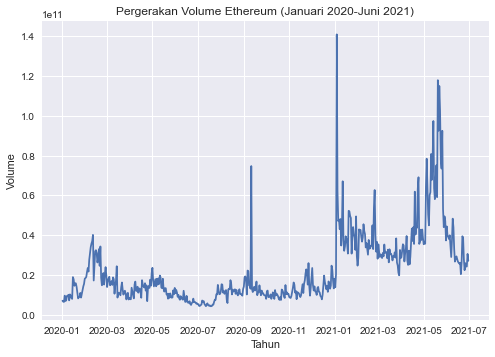

In [13]:
plt.plot(gecko_ete['Date'],gecko_ete['Volume'])
plt.title("Pergerakan Volume Ethereum (Januari 2020-Juni 2021)")
plt.xlabel('Tahun') 
plt.ylabel('Volume') 


### Insight :

- Dapat dilihat pada Bulan Januari 2021 pergerakan nilai transaksi Volume yang besar sehingga dapat disimpulkan bahwa banyak orang yang bertransaksi sehingga pada bulan tersebut aset Ethereum tengah populer pada bulan itu.
- Dapat juga dilihat bahwa sejak Januari 2021 transaksi Volume meningkat tetapi mengalami penurunan drastis semenjak April 2021 

<!-- This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`. -->